# Generic Instrument

Here we shall go through the process to analyse the impact of atmospheric dispersion on a generic fibre spectrograph.

In [1]:
from atmosphyre import dispersion
import numpy as np

## Basic Analysis

First we must initialise the class object. In more complicated cases, parameters can be entered when initialising to customise the simulation - but for now we'll keep the defaults.


In [2]:
simulation=dispersion.sim()

All the analysis takes place with object methods/functions. 

For every analysis, the first key step is to define the observation's start and end in local hour angles, and the target declination in degrees

In [3]:
simulation.load_observation(observation_start=2,observation_end=3,declination=-30)

Next we need to input the wavelengths we want to simulate atmospheric dispersion for. 

We need a set of discrete wavelengths to be used: the more values, the more accurate the simulation, but the slower it is. 

In [4]:
simulation.load_wavelengths(wavelengths=np.linspace(.4,.8,50))

With the observation defined and the wavelengths set, the next step is to calculate the shifts experienced due to atmospheric dispersion for each wavelength at the various airmasses that are found during the observation.

Two key values are needed in every simulation:

1) The guiding wavelength: this is the wavelength the telescope tracks on, and this wavelength will be fixed on the focal plane whilst wavelengths either side are dispersed. Think of it as the fixed part of the dispersed spectrum.

2) The aperture wavelength: this is the wavelength that the aperture centres are placed on, by default defined by the dispersion halfway through the observation. Think of it as where the apertures are placed on the dispersed spectrum.

In [5]:
simulation.calculate_integration_shifts(guide_wavelength=.7,aperture_wavelength=.6)

In [6]:
simulation.load_aperture(aperture_major_axis=.5)

In [7]:
simulation.load_PSFs()

In [8]:
simulation.calculate_integration_transmissions()

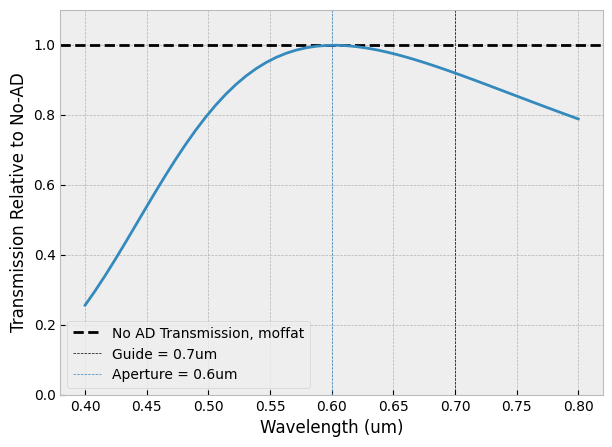

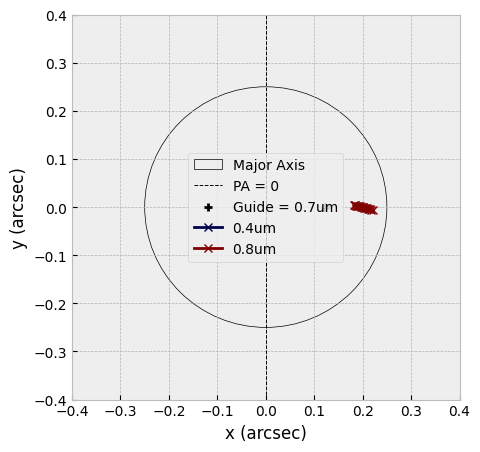

In [9]:
simulation.integration_plots()

## Very Basic (but quick) Analysis

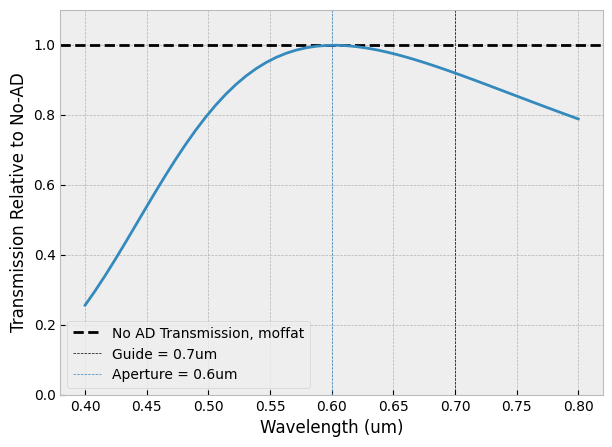

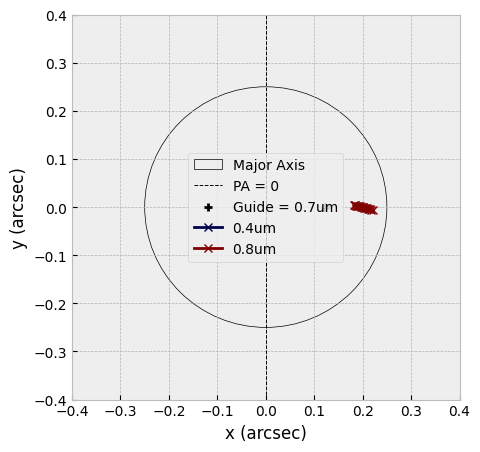

In [10]:
simulation=dispersion.sim()
simulation.run(observation_start=2,observation_end=3,declination=-30,wavelengths=np.linspace(.4,.8,50),aperture_major_axis=.5,guide_wavelength=.7,aperture_wavelength=.6)

## Optimising Guide and Aperture Wavelengths